Example 10 - Implement an Autoencoder using Pytorch for MNIST and Fashion-MNIST data. Show the loss in reconstruction using quantitative metrics like PSNR, NMI, and SSIM. Increase and decrease the layers in the autoencoder to see the effect on reconstruction. 

In [20]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np


In [5]:
tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
class AE(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = torch.nn.Sequential(
        torch.nn.Linear(28 * 28, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 36),
        torch.nn.ReLU(),
        torch.nn.Linear(36, 18),
        torch.nn.ReLU(),
        torch.nn.Linear(18, 9)
    )

    self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
    
  def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return encoded,decoded



In [7]:
model = AE()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-1,
                             weight_decay = 1e-8)

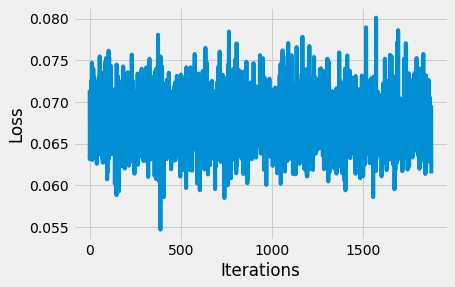

In [22]:
epochs = 1
outputs = []
losses = []
for epoch in range(epochs):
  for (image, _) in loader:

    image = image.reshape(-1,28*28)

    reconstructed = model(image)[1]

    loss = loss_function(reconstructed, image)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss)
  outputs.append((epochs, image, reconstructed))
# Convert the list of tensors to a NumPy array
losses_arr = np.array([loss.detach().numpy() for loss in losses])
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
# Plot the losses using Matplotlib
plt.plot(losses_arr)
# # Plotting the last 100 values
# plt.plot(losses[-100:])


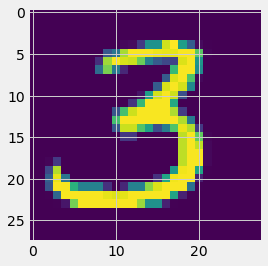

In [24]:

for i, item in enumerate(image):
   
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  
  plt.imshow(item[0])
 


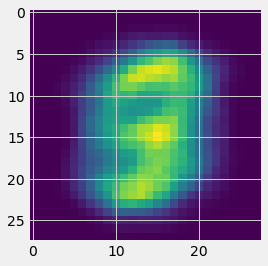

In [25]:
for i, item in enumerate(reconstructed):
  item = item.detach()
  item = item.reshape(-1, 28, 28)
  
  plt.imshow(item[0])